# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [60]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


In [61]:
# Check for Nulls
print(data.isnull().any())

# Check the shape
print(data.shape)

# check for numbers
print(data.describe())

Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicatessen        False
dtype: bool
(440, 6)
               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    4

## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [62]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [63]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [50, 100, 200]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6269,1095,1980,3860,609,2162
1,11594,7779,12144,3252,8035,3029
2,3067,13240,23127,3941,9959,731


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.2
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8


Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

Looking the first customer(i.e. index 50),  it is curious that except "delicatessen", its spent is significantly below the average in the other features. The spent in "fresh" is around the half of the mean, "milk" is around a fifth, "grocery" is close to a fourth, "frozen" is close to the mean, "detergent & paper" is also close to a fifth. Based on this, I could say that the customer might be a small bistro in a small place with no public bathroom, no space for tables for clients, and not a big menu, maybe a limited time open just for lunch.

In contrast, the second customer is above the mean in every feature except for "milk" and "delicatessen". One feature that is spectacularly above the mean is "detergents_paper" with 8035. Because of this, it might be a restaurant with many tables, where many dishes have to be cleaned and paper is consumed in the restroom.

The last customer has the highest spending in "milk", "grocery", "frozen", and "detergent_paper" compared to the other two customers. It might be a restaurant chain or hotel in a privileged area with many clients. From these features, "grocery" has the highest spent by any other feature with 23127, the follow "milk" with 13240 and then "detergents_paper" with 9959. 



### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [82]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import random
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
y = data.filter(['Milk'],axis=1)
new_data = data.copy()
new_data.drop(['Milk'], axis = 1, inplace = True)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
scoreSum=0;
for x in range(0, 50):
    randomState = random.randint(1,100)
    X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.25, random_state=randomState)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = tree.DecisionTreeRegressor()
    regressor = regressor.fit(X_train, y_train)
    regressor.predict(X_test)
    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    scoreSum+=score
scoreMean = scoreSum/50
print "Average score: " + str(scoreMean)

Average score: 0.179892383231


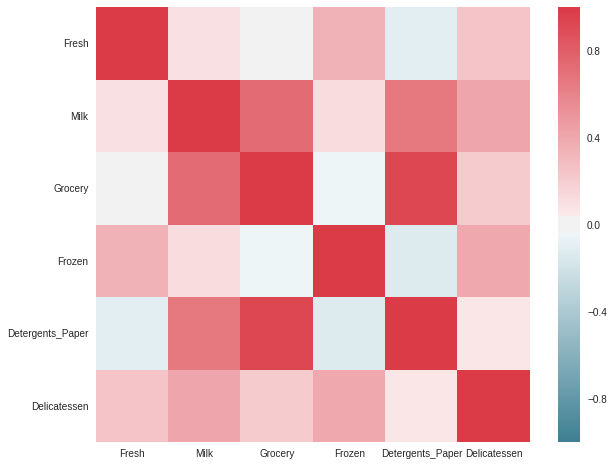

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**


**Which feature did you attempt to predict?<br>**
The feature that I attempted to predict was "Milk"<br>
**What was the reported prediction score?<br>**
The score is 0.1798<br>
**Is this feature necessary for identifying customers' spending habits?<br>**
Because of the low R^2 score of 0.1798, while trying to predict the "milk" spent. It might be possible that the feature contains important information about the expenditure of a customer due to the fact that it seems that does not contain repeated information or is wide spread. Hence, it could add value to the model to predict spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

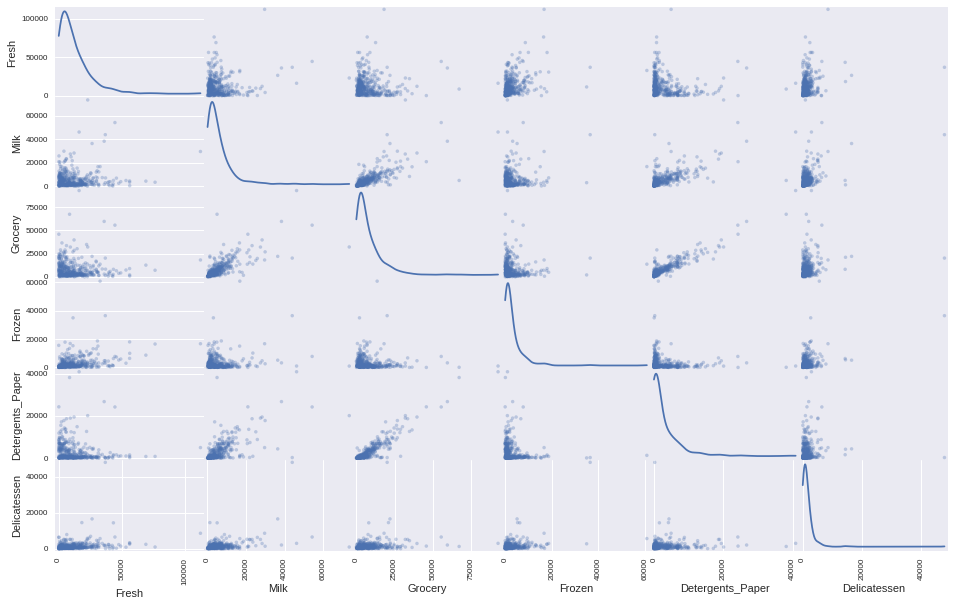

In [83]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (16,10), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
The scatter matrix above presents the relationship among each feature in the customers' annual spending amounts dataset.

At first glance, we can observe that the strongest relationship is between "detergent_papers" and "grocery", followed by a moderate correlation between "milk" with "grocery", and "milk" with "detergent_papers".

However, looking into the scatter matrix above, we can observe that every feature is not normally distributed. Instead, every feature presents a positive skewed, in some cases as "detergent_paper" almost exponential. This affects directly the possibility to develop accurate clusters. Thus, this indicates that a preprocessing step is necessary in order to reshape the distribution of each feature.

Looking into more details, it can be detected that each variable has many noisy values or outliers that should be removed to develop a better model. Each feature has extremely minimum and maximum values compared with the mean and even with the 75% of the data. For instance, "milk" has a mean of 5796.26, with a minimum value of 55.00 and a maximum value of 73498.00; "grocery" reports a mean of 7951.27, with 3.00 and 92780.00 as the lowest and highest value respectively.

Last, "milk" the feature that I tried to predict, in the previous question showed a poor correlation with the other features. Hence, if we would have kept only with the previous analysis, we would have said that this feature is not relevant for the dataset. However, we can detect two important insights after a deeper analysis. First, "milk" has a mild correlation with two other variables, "grocery" and "detergent" which could help when we create the principal components. And second, even when showed a poor R^2 score, we can observe that since the feature is not capable of being predicted by the other features, it might be possible that the distribution that contains a vast range of values could provide important insights for the other features, when "milk" is associated with specific features, due to the fact that could contain a high variance and for PCA is what we try to maximise. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

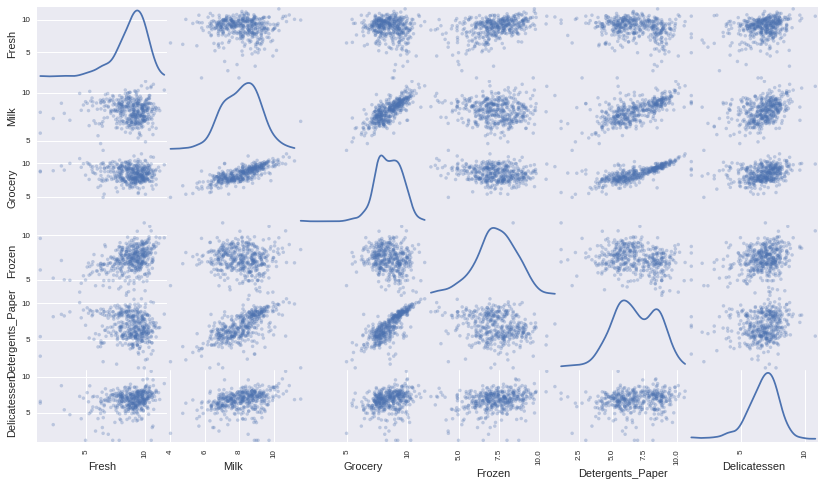

In [84]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples) 

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [85]:
# Display the log-transformed sample data
display(log_samples)
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.743372,6.998510,7.590852,8.258422,6.411818,7.678789
1,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
2,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6269,1095,1980,3860,609,2162
1,11594,7779,12144,3252,8035,3029
2,3067,13240,23127,3941,9959,731


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [87]:
# For each feature find the data points with extreme high or low values
outliersList = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5 
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outlier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    outliersList += outlier
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers = list(set(outliersList))
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**


**Are there any data points considered outliers for more than one feature based on the definition above? <br>**
Yes, indexes 65 in fresh and frozen; 66 and 128 for fresh and delicatessen; 75 for grocery and detergents_paper; and 154 in milk and delicatessen.<br>
**Should these data points be removed from the dataset?<br>** 
Yes, I consider that these data points should be removed since produce noise to the model.<br>
**If any data points were added to the `outliers` list to be removed, explain why.<br>**
Outliers do not help to create an accurate and strong model. They should be removed so the model could find a pattern easier with centred data instead of the entire spread one.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[[-0.09758688  0.41085006  0.45111781 -0.12804262  0.75951245  0.15785331]
 [ 0.60077834  0.1369893   0.08516261  0.62996118 -0.03761194  0.46344461]
 [-0.74520543  0.15440822 -0.02038937  0.26695167 -0.23485013  0.54221164]
 [ 0.26670888  0.13749532  0.0709773  -0.71328102 -0.31568384  0.54451588]
 [ 0.0114087   0.70825884  0.31682301  0.06711674 -0.47290085 -0.41197399]
 [-0.05428877 -0.51774387  0.82668599  0.04707807 -0.20803866 -0.00937317]]
---------------------------
Dimension 1    0.4993
Dimension 2    0.7252
Dimension 3    0.8301
Dimension 4    0.9279
Dimension 5    0.9767
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


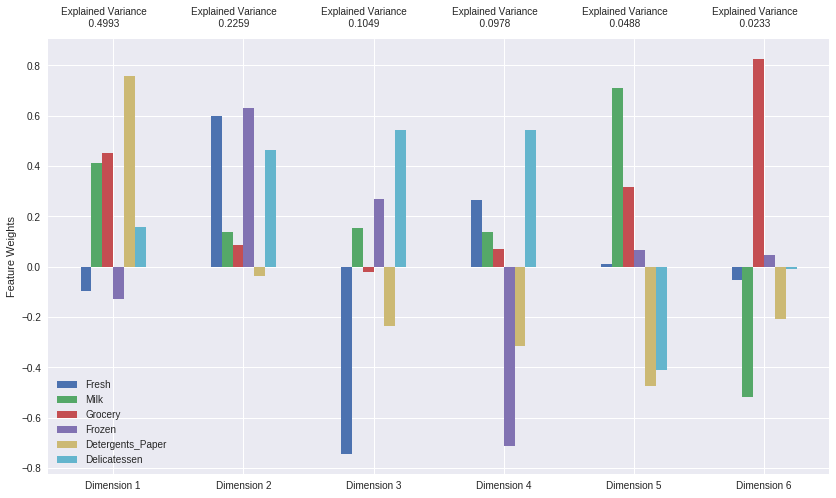

In [88]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
print pca.components_
print"---------------------------"
print pca_results['Explained Variance'].cumsum()

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
**How much variance in the data is explained* in total *by the first and second principal component?**<br> 
The total variance from 1st and 2nd principal component is 0.7252<br>
**How much variance in the data is explained by the first four principal components?** <br>
The total variance from the first four principal components is 0.9279<br>

Overall, we can observe that within the first 4 principal components, 3 features obtained the highest weight with values close to 0.8 and -0.8. The first feature is "detergent_papers" in the first principal component with a weight of 0.759. Then, in the third principal component, we found "fresh" reporting -0.745. Last, the feature "frozen" had a score of -0.713 in the 4th principal component. 

The first principal component shows three features correlated, "milk", frozen", and as previously mentioned, "detergent_paper". The first two features are not quite correlated because have a weight of 0.410 and 0.451 respectively. But, it is important to mention that this first principal component has the highest variance explaining half of the data with a value of 0.4993. It might be possible that this dimension represents restaurants that serve only breakfast or dinners since no "fresh" products are highly consumed, and more milk and groceries with "detergent_paper" which is required to keep clean the establishment. 

The second component presents 3 different correlations with "fresh", "frozen", and "delicatessen". From these three, "frozen" is the feature with the highest weight with 0.629, then fresh with 0.600 and last "delicatessen" with 0.463. We could associate this dimension with customers that might not cook and only serve cold dishes with gourmet products such as bistros, or maybe local markets or retailers that buy these type of products to place them in their racks and sell them.

The third and fourth dimension shows an interesting behaviour with the feature "delicatessen" that is correlated with two different components in each dimension. That is, in both cases the weight is almost the same for "delicatessen" with 0.542 and 0.544 for the 3rd and 4th dimension respectively. And, both dimensions present a strong correlation, the 3rd principal component with "fresh" having -0.745, and the feature frozen" in the 4th dimension with a score of -0.713. It might be that the 3rd principal component represents restaurants or retailers, and the 4th principal component hotel since they require products that last longer. 

In conclusion, we see that in the first four principal components the most represented variables are "detergent_paper", "fresh", and "frozen", with scores above 0.60. Additionally, "delicatessen" had weights above 0.45 from the second to the fourth principal components. The worst features were "milk" and "grocery" reaching their best results in the first principal component but poor result in the other three following dimensions. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [89]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.0691,0.6047,0.7706,-0.2588,-1.1878,0.0163
1,2.5291,1.3485,0.1094,-0.2050,-0.5879,-0.0808
2,3.0820,0.1314,0.3994,-1.4197,0.4747,0.2263


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [90]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [91]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.0691,0.6047
1,2.5291,1.3485
2,3.0820,0.1314


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

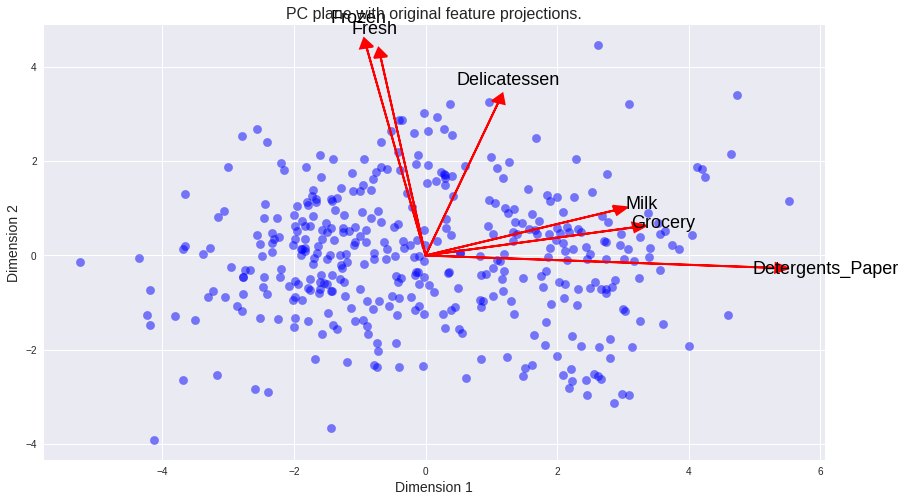

In [92]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

**What are the advantages to using a K-Means clustering algorithm?<br>**
 One of the two best-recognised advantages is the simplicity and the speed of the algorithm. It is simple to interpret the results and responds well to high dimensional data. Moreover, it guarantees a termination.[1][2]<br>
**What are the advantages to using a Gaussian Mixture Model clustering algorithm?<br>**
Does not make any assumption regarding instance's geometry. Instead of using distance to create clusters, implements probability. Not required number of clusters is needed as initial parameters. It works well with non-linear distributions. The algorithm has the ability to form smooth approximations for general probability density functions. [2][3]<br>
**Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?<br>**
Based on the literature reviewed, I would consider using the Gaussian Mixture Model, since the data is not linear, and even when we reduced the information to two dimensions, I do not think the distance between instances is a key factor to predict customers spent. Instead, it could be probability based. 

[1] Arthur, D. and Vassilvitskii, S., 2007, January. k-means++: The advantages of careful seeding. In Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms (pp. 1027-1035). Society for Industrial and Applied Mathematics.<br>
[2] Phanindra Varma, March 27 2017, https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian<br>
[3] Huang, Y., Englehart, K.B., Hudgins, B. and Chan, A.D., 2005. A Gaussian mixture model based classification scheme for myoelectric control of powered upper limb prostheses. IEEE Transactions on Biomedical Engineering, 52(11), pp.1801-1811.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [93]:
from sklearn import mixture 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = mixture.GaussianMixture(n_components=2, covariance_type='spherical', random_state=42).fit(reduced_data)
clusterer2 = KMeans(n_clusters=2, random_state=42).fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
preds2 = clusterer2.predict(reduced_data)
# TODO: Find the cluster centers
centers = clusterer.means_
centers2 = clusterer2.cluster_centers_

print "center of GMM: "
print centers
print "center of K-means: " 
print centers2
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
sample_pred2 = clusterer2.predict(pca_samples)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
score2 = silhouette_score(reduced_data, preds2)
print "-----"
print score
print score2

center of GMM: 
[[-1.26771299  0.08888417]
 [ 1.97631289 -0.1385668 ]]
center of K-means: 
[[-1.3899988   0.14110469]
 [ 2.11139058 -0.21433623]]
-----
0.450392718482
0.447157742293


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?




**Answer:**

**For this part of the project, I did not want to try only one unsupervised method, that is why I tried both options. **

The score for the GMM are:<br>
2 components and covariance_type="full" = 0.4474<br>
2 components and covariance_type="tied" = 0.4446<br>
2 components and covariance_type="diag" = 0.4501<br>
2 components and covariance_type="spherical" = 0.4503<br>
3 components and covariance_type="full" = 0.3611<br>
4 components and covariance_type="full" = 0.3182<br>
5 components and covariance_type="full" = 0.3130<br>
8 components and covariance_type="full" = 0.3291<br>
The score for the Kmeans are:<br>
2 clusters = 0.4471<br>
3 clusters = 0.3639<br>
4 clusters = 0.3311<br>
5 clusters = 0.3531<br>
8 clusters = 0.3689<br>

The best score was of 0.4503 with two components and a covariance type of "spherical" using the Gaussian Mixture Model.


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

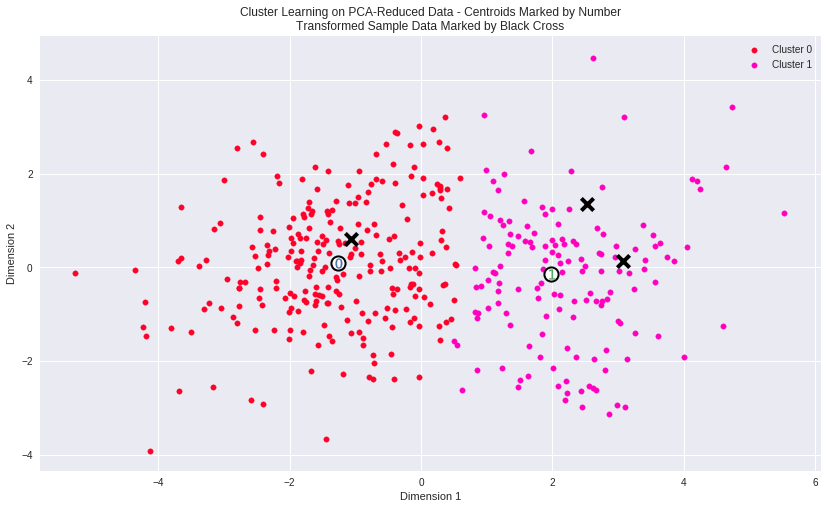

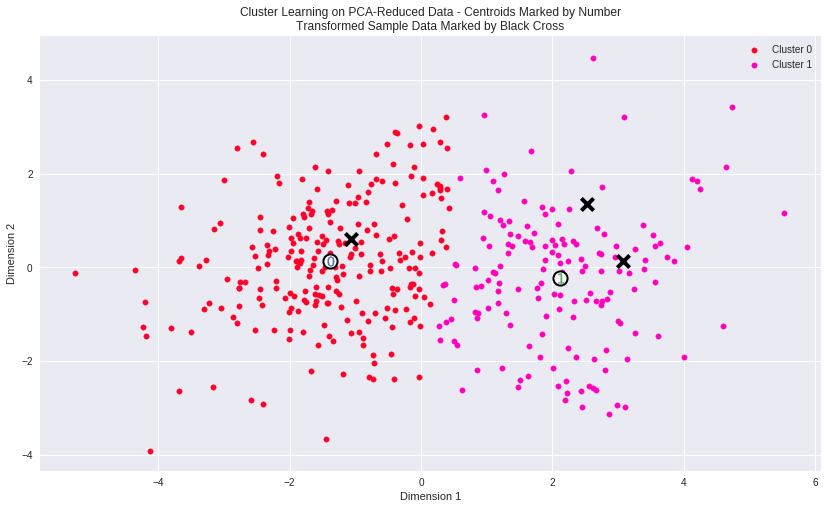

In [94]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

vs.cluster_results(reduced_data, preds2, centers2, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [95]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
#display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9050.0,2024.0,2577.0,2095.0,337.0,767.0
Segment 1,5752.0,7437.0,10920.0,1199.0,3999.0,1152.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Overall, we can detect two main types of clients, the ones that spend a high amount of money in "detergent_paper" and those who do not. 

In one hand, The segment 1 corresponds to the clients that consume a considerable amount of "detergent_paper" and also a substantial expend in "milk" and "grocery". Hence, we could expect that a client that buys a lot of "detergent_paper" will acquire many "milk" and "grocery". Comparing the segment 1 values with the entire dataset, we can view that these three features are above the mean by a significant amount. 

Segment 0 on the other hand, represents clients that do not spend a lot of money in any feature in general. The entire values from the segment 0 are below the mean of the entire dataset having the highest consumption in "fresh" and important spend in "frozen" also. However, none of these features are strongly correlated as the segment 1 with "detergent_paper", "milk", and "grocery". Instead, a weak relation among "fresh", "frozen", and "detergent_paper" should be considered.

After analysis, we can conclude that there are two types of clients, maybe big restaurants chains or coffee franchises, and independent/small or local markets. The difference between the amount spent on key features is significant, and the identification of each type of client, based on the segments found, is easily recognized.



### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [96]:
display(samples)
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6269,1095,1980,3860,609,2162
1,11594,7779,12144,3252,8035,3029
2,3067,13240,23127,3941,9959,731


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

Yes, I consider the sample points are correctly clustered in each segment due to the amount expended in the key features previously discussed. Sample 0 has a low consumption in "detergent_paper", "milk", "grocery", and a higher consumption in "fresh" and "frozen". Sample 1 and 2, are close to the center value of segment 1 regarding "detergent_paper" and tremendous spent in "milk" and "grocery".

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

To design the A/B test, I assume that the goal of reducing the delivery days from 5 to 3 is to increase sales. Hence, my null hypothesis is: "changing from 5 to 3 days the delivery service will no increase my revenue". To develop a more accurate research, I would suggest conducting an A/B test for each segment(i.e. segment 0 and segment 1) in order to work with similar clients based on their spent and type of products purchased. After identifying each client per segment, the customers selected to change from 5 to 3 could be the oldest or more confident in order to explain them the reasons for this change focused on the client's side such as better service, freshest products, identify products that are sold more than others, etc. At the end, after a specific period of time, maybe a month, review and compare the sales from each client with the previous months and see whether there is a significant difference in order to discard the null hypothesis.

I think both segments could react positively to this change. However, the wholesale distributor has to focus on key products for each segment. For example, segment 0 customers do not consume many products at all, and they may find it difficult to pay as their return on investment could take longer. For segment 0 it can only work with "fresh" products, considering it is the most expensive feature and fresh products expire faster than frozen or edible products.

Customers in segment 1 could also benefit. Considering the amount of expedited in groceries and milk, and I suppose they are large chain restaurants or cafes. They might be interested in getting more fresh fasts, it could help them reduce their stores or space. On the other hand, wholesale distributors with thesis clients could increase their sales using the "supermarket" features that we know the expense is high. Groceries represent many products and could encourage each customer to buy more than one product by buying another one that has been previously identified.

It could be a risky change since a more continuous delivery represents more expenses in the logistics area. For example, more gasoline, more payment to drivers, more investment in logistics areas, more people to move more products more quickly, to name a few.

Instead of using this study to change the delivery service for 5 to 3 days, I would use it to look at each customer and develop a strategy to increase sales in each segment. After that, if consumption is increasing and our delivery area cannot deliver more in 5 days move it to 3 days. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

After clustering the information in segment 0 or 1, we can add this result of each customer as a new feature. Since this information is 0 or 1 we can identify each client by using a Decision Tree, Random Forest,  Naive Bayes or SVM, using this segment label as the target variable.    

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

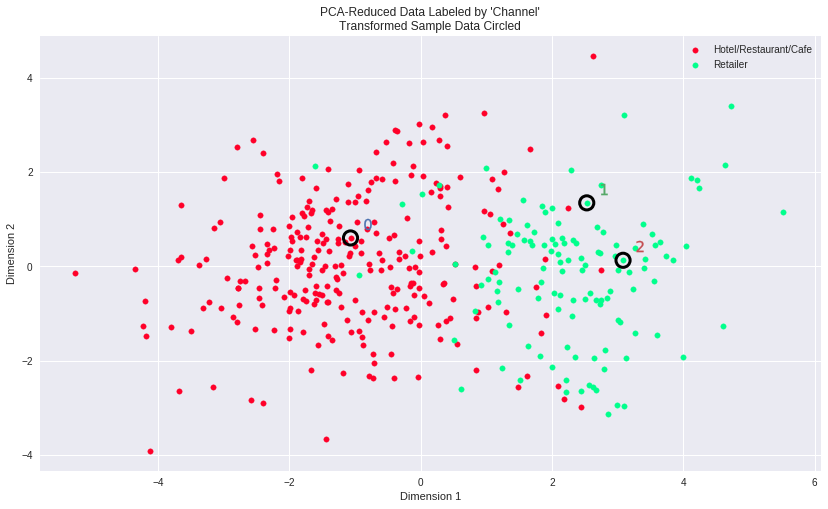

In [97]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**


**How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?**<br>
I consider that pretty well, comparing the chart above with the chart on the "cluster visualization" section. My selection of cluster was 2 which is similar to the type of customers: 1)Hotels/Restaurants/Cafes, 2)Retailers. The distribution is similar maybe not accurate with the hotels/restaurant/cafes that are close to retailers but still gives a similar distribution.<br>

**Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution?**<br>
Based on the information, yes. I think is easier for 'Hotels/Restaurants/Cafes that are located in the bottom left or extreme left in the chart. The centre of the chart is divided by both customer and it could be hard to identify each. A clear portion in the extreme right is defined by retailers only.<br> 

**Would you consider these classifications as consistent with your previous definition of the customer segments?**<br>
Yes, maybe as mentioned previously the classification in the middle of the dimensions is hard to identify, but as the customers spread more it is easier to distinguish between the segment they belong

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.